# Analysis of bacterial cell oritetation in microchannels
Analyse cell oritentation distribution in microchannels simulated with `CellModeller` [1].

## Purpose
Compare simualtion and experimental cell oritentation data to calibrate simulation parameters.

## Methodology
1. Read `.pickle` file into dictionary with `pickle` module.
2. Plot cell oritentation histogram for each simulation step.
3. Coallete all histograms into one interactive figure.

## WIP - improvements
Use this section only if the notebook is not final.

## Notable TODOs:

- Load multiple `.pickle` files. Store in a dictionary `{simulation_step: cell_state}`
- Plot oritentation histogram for each simulation step.
- Use `plotly` to visualize multiple steps in one figure.
- Copy model file to output directory.

## Results
`norm` - cell orientation vector. **Note** Already normalized. 

## Suggested next steps
- Load, process and analyse experimetal data
- Compare experimetal and simualtion data plots

# Setup
## Library import

In [1]:
import os
from os.path import join as join_paths, basename as get_basename
import glob

import pickle
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
os.chdir("/home/i/igors-dubanevics/projects/bacteria-microchannel")
os.getcwd()

'/home/i/igors-dubanevics/projects/bacteria-microchannel'

## Parameter definition

In [3]:
data_dir_path = "data/microch_30x4-22-11-14-13-40"

out_dir_path = join_paths("scratch", get_basename(data_dir_path))

# Time-step
dt = 0.005 # [min]

## Pre-data import

In [4]:
# Create output dir
os.makedirs(out_dir_path, exist_ok=True)

## Data import

In [5]:
# Store data in a dictionary of form {step_number: cell_state}
cell_states = {}

# Get data from saved pickle files
filenames = sorted(glob.glob(join_paths(data_dir_path, 'step-00*.pickle')))
for filename in filenames:
    # Extract simualtion step number from a filename
    step_num = int(get_basename(filename).replace(".pickle","").replace("step-",""))
    data = pickle.load(open(filename,'rb'))
    cs = data['cellStates']
    cell_states[step_num] = cs

## Data processing

In [6]:
lengths = {}
postions = {}
orients = {}

for step_num, cell_state in cell_states.items():
    # Make some convenient data arrays from cell properties
    length = np.array([cell.length for (id,cell) in cell_state.items()]) # [um]
    # Postion in respect to the center of simulation
    # Assume it's center of the channel (0,0)
    pos = np.array([cell.pos for (id,cell) in cell_state.items()])
    # Normalized orientation vector
    orient = np.array([cell.dir for (id,cell) in cell_state.items()])

    lengths[step_num] = length
    postions[step_num] = pos
    orients[step_num] = orient

In [7]:
# Calculate angle in respect to a channel
angles = {}
# Unit-vector parallel to the channel (pointing left-to-right)
x_norm = np.array((1,0,0), dtype=float)
for step_num, orient in orients.items():
    # Dot product with a unit-vector parallel to channel
    inner_prods = np.inner(x_norm,orient)
    # Dot product to radians
    rads = np.arccos(inner_prods)
    # Convert radians to degrees
    angles[step_num] = np.rad2deg(rads)

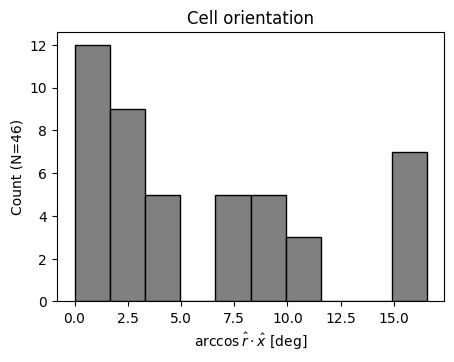

In [9]:
# Plot histograms of some cell properties

# Orientation
plt.figure(figsize=(5,3.5))
plt.title("Cell orientation")
plt.hist(angles[990], edgecolor='black', color='gray')
plt.xlabel(r"$\arccos{\hat{r}\cdot\hat{x}}$ [deg]")
plt.ylabel('Count (N=%d)'%(len(angles[990])))
plt.savefig(join_paths(out_dir_path,'oritent_hist.pdf'), dpi=300)
# plt.close()

In [ ]:
# Plot histograms of some cell properties

# Length
plt.figure(figsize=(5,3.5))
plt.title("Cell orientation")
plt.hist(angles[990], edgecolor='black', color='gray')
plt.xlabel(r"$\arccos{\hat{r}\cdot\hat{x}}$ [deg]")
plt.ylabel('Count (N=%d)'%(len(angles[990])))
plt.savefig(join_paths(out_dir_path,'oritent_hist.pdf'), dpi=300)
plt.close()

In [20]:
# Plot histograms of some cell properties
fig = px.histogram(angles[990], 
    title="Cell orientation along x-axis")
fig.update_layout(bargap=0.2,
    xaxis={"title":  "Orientation [rad]"},
    yaxis={"title":  "Count (N=%d)"%(len(angles[990]))})
fig.show()

In [ ]:
# Plot histograms of some cell properties

# Length
plt.figure(figsize=(5,3.5))
plt.title('Cell length')
plt.hist(lengths, edgecolor='black', color='gray')
plt.xlabel('$\mu m$')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig(join_paths(out_dir_path, 'length_hist.pdf'), dpi=300)

# Distance from origin
plt.figure(figsize=(5,3.5))
plt.title('Distance from origin')
plt.hist(np.sqrt(pos[:,0]**2+pos[:,1]**2), edgecolor='black', color='gray')
plt.xlabel('$\mu m$')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig(join_paths(out_dir_path, 'pos_hist.pdf'), dpi=300)

## References
We report here relevant references:
1. https://github.com/cellmodeller/CellModeller
2. 